In [56]:
import pandas
df = pandas.read_csv('data_edited_2018.csv')
df['dt'] = df['date'] + ' ' + df['time']
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y/%m/%d %H:%M')
df.set_index('dt', inplace=True)
df.head()

,date,time,y,dayofweek,sms,month,workday,lag_48_1,lag_48_2,lag_48_3,lag_48_4,lag_48_5,lag_48_6,lag_48_7
dt,,,,,,,,,,,,,,
2018-01-01 00:00:00,2018/1/1,00:00,10,1,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,2018/1/1,00:30,6,1,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,2018/1/1,01:00,4,1,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:30:00,2018/1/1,01:30,5,1,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,2018/1/1,02:00,1,1,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df['sms'] = df['sms'].fillna(0)

In [58]:
df['sms'] = df['sms'].fillna(0)
dataset = df[['y', 'dayofweek', 'sms', 'month', 'workday']]

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


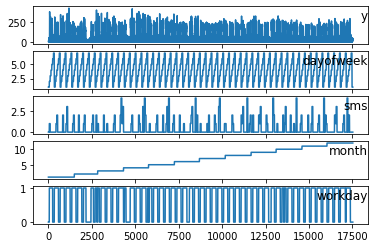

In [59]:
%pylab inline
from matplotlib import pyplot
values = dataset.values

groups = [0, 1, 2, 3, 4]
i = 1
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [60]:
dataset = df[['y', 'dayofweek', 'sms', 'month', 'workday']]

In [61]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pandas.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pandas.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [62]:
dataset.head()

,y,dayofweek,sms,month,workday
dt,,,,,
2018-01-01 00:00:00,10,1,0.0,1,0
2018-01-01 00:30:00,6,1,0.0,1,0
2018-01-01 01:00:00,4,1,0.0,1,0
2018-01-01 01:30:00,5,1,0.0,1,0
2018-01-01 02:00:00,1,1,0.0,1,0


In [63]:
values = dataset.values 

In [64]:
from sklearn.preprocessing import MinMaxScaler

values = dataset.values 

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 2, 1)

In [65]:
reframed.head()

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
2,0.023095,0.0,0.0,0.0,0.0,0.013857,0.0,0.0,0.0,0.0,0.009238,0.0,0.0,0.0,0.0
3,0.013857,0.0,0.0,0.0,0.0,0.009238,0.0,0.0,0.0,0.0,0.011547,0.0,0.0,0.0,0.0
4,0.009238,0.0,0.0,0.0,0.0,0.011547,0.0,0.0,0.0,0.0,0.002309,0.0,0.0,0.0,0.0
5,0.011547,0.0,0.0,0.0,0.0,0.002309,0.0,0.0,0.0,0.0,0.002309,0.0,0.0,0.0,0.0
6,0.002309,0.0,0.0,0.0,0.0,0.002309,0.0,0.0,0.0,0.0,0.002309,0.0,0.0,0.0,0.0


In [66]:
reframed.drop(reframed.columns[[0,1,2,3,4,11,12,13,14]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
2,0.013857,0.0,0.0,0.0,0.0,0.009238
3,0.009238,0.0,0.0,0.0,0.0,0.011547
4,0.011547,0.0,0.0,0.0,0.0,0.002309
5,0.002309,0.0,0.0,0.0,0.0,0.002309
6,0.002309,0.0,0.0,0.0,0.0,0.002309


In [67]:
values = reframed.values
pos = 13140
train = values[:pos, :]
test = values[pos:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((13140, 1, 5), (13140,), (4378, 1, 5), (4378,))

In [68]:
import keras
from keras import layers
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


model = keras.models.Sequential()
model.add(layers.LSTM(50, return_sequences = True,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(layers.LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(layers.LSTM(50))
model.add(Dropout(0.2))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [69]:
history = model.fit(train_X, train_y, 
                    epochs=10, 
                    batch_size=30, 
                    validation_data=(test_X, test_y),  
                    shuffle=False)


Train on 13140 samples, validate on 4378 samples
Epoch 1/10
13140/13140 [==============================] - 3s 242us/step - loss: 0.0141 - val_loss: 0.0051
Epoch 2/10
13140/13140 [==============================] - 2s 143us/step - loss: 0.0042 - val_loss: 0.0025
Epoch 3/10
13140/13140 [==============================] - 2s 136us/step - loss: 0.0039 - val_loss: 0.0023
Epoch 4/10
13140/13140 [==============================] - 2s 130us/step - loss: 0.0036 - val_loss: 0.0022
Epoch 5/10
13140/13140 [==============================] - 2s 133us/step - loss: 0.0034 - val_loss: 0.0022
Epoch 6/10
13140/13140 [==============================] - 2s 131us/step - loss: 0.0034 - val_loss: 0.0024
Epoch 7/10
13140/13140 [==============================] - 2s 130us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 8/10
13140/13140 [==============================] - 2s 130us/step - loss: 0.0033 - val_loss: 0.0023
Epoch 9/10
13140/13140 [==============================] - 2s 132us/step - loss: 0.0032 - val_loss: 0.00

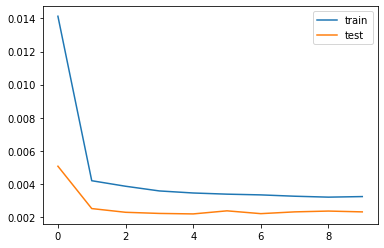

In [70]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [71]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [72]:
import numpy as np
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [73]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(inv_y, inv_yhat)
rmse

432.3223570016956

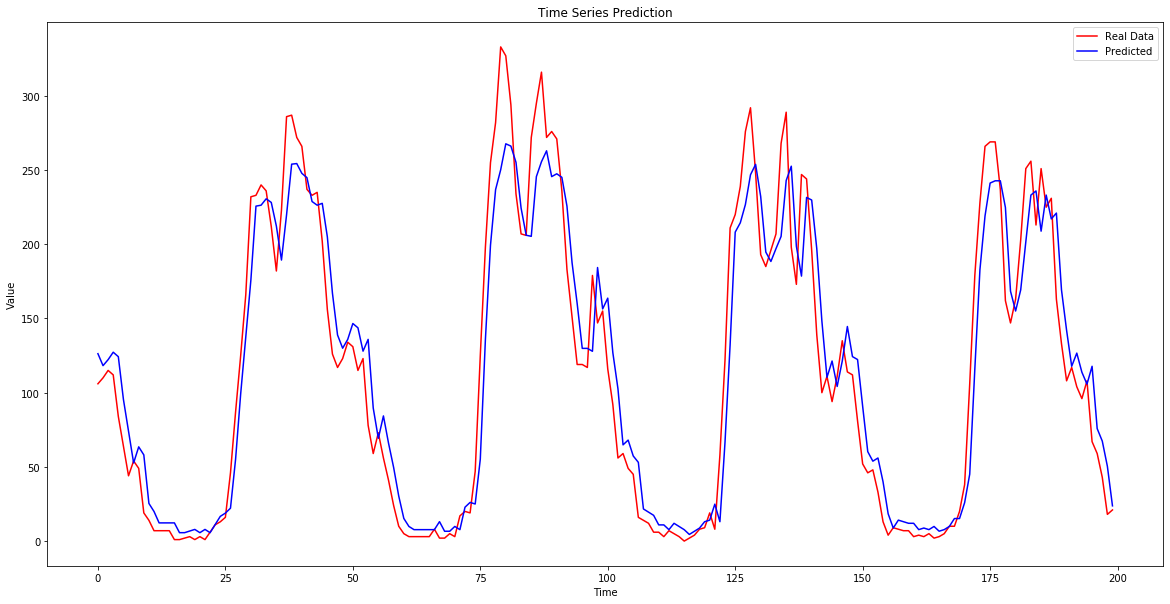

In [74]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.plot(inv_y[0:200], color = 'red', label = 'Real Data')
plt.plot(inv_yhat[0:200], color = 'blue', label = 'Predicted')
plt.title('Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()